# UPDATED 2016 July 26

## CHANGES to make

  * change xticklabels from barcode seqs to arbitrary #s
  * mask cfu-only (got rid of 'lost in pipeline' samples and pet-neg cfu-neg samples)
  * (in next iteration: apply quantitative shadowing)
  * make yticklabels bigger (condense: remove prefix ?)
  * how to display all four monkeys at once?
  * extra: auto layout.....

In [1]:
%matplotlib inline

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
INPUT_FOLDER = '../data/wrangled/merged/'
# OUTPUT_FOLDER = '../figs/v1-2016-07-26/'
# DATE = '2016-07-26'
FORMATS = ['svg','pdf']


In [4]:
# color values
POSITIVE = '#BA053C'# dark pink
NEGATIVE = '#FFE9B2' #yellow
STERILE = '#C2EDEF' #light blue
FILLER =  '#FF9C09' #orange

COLOR_VALS = np.array([POSITIVE, NEGATIVE, STERILE, FILLER])

In [153]:
# cats for pivot table
INDEXES = ['lesion_tissue_type','lesion_locus','z','lesion','lesion_dissem_type']
COLUMNS = ['barcode_dissem_type','barcode_id','barcode']
VALUES = ['percent_molecs']


In [106]:
def find_files():
    files = np.array([])
    for directory, sub, fnames in os.walk(INPUT_FOLDER):
        for f in fnames:
            if f.split("-")[0]=='merged' and f[-4:]=='.csv': 
                fpath = "%s%s"%(directory, f)
                files = np.append(files, [fpath])
    return files
files = find_files()


In [209]:
def make_pivot_df(fname):
    data = pd.read_csv(fname)
    data[['x','y','z']] = data[['x','y','z']].replace(to_replace=np.nan, value=-float('inf'))
    pivotdf = pd.pivot_table(data, index=INDEXES, columns=COLUMNS, values=VALUES, fill_value=-1)
    
    pivotdf.sort_index(level=['lesion_tissue_type','lesion_locus','z'], 
                       ascending=[True,True,False],inplace=True)
    pivotdf.columns = pivotdf.columns.droplevel([0,'barcode'])
    pivotdf.columns.index = pivotdf.columns.sortlevel(level=['barcode_id'],
                                                      ascending=True)
    loci = []
    barcode_types = pivotdf.columns.levels[0]
    for l in pivotdf.index.get_level_values('lesion_locus'):
        if not l in loci: loci.append(l)    
    return pivotdf, loci, barcode_types



In [383]:
def assign_new_barcode_ids(pivotdf):
    def apply_max_lesion_z(col):
        values = col.loc[col>-1].loc['Gran',:].index.get_level_values('z').values
        return max(values) if len(values) > 0 else -float('inf')
            
    max_z = pivotdf.apply(apply_max_lesion_z)
    new_barcode_ids = pd.DataFrame(max_z).reset_index().sort_values(by=['barcode_dissem_type',0],ascending=False)
    new_barcode_ids.rename(columns={0:'max_lesion_z'}, inplace=True)
    new_barcode_ids.barcode_id = range(1, len(new_barcode_ids)+1)
    return new_barcode_ids

def reindex_pivotdf_cols(pivotdf):
    new_barcode_ids = assign_new_barcode_ids(pivotdf)
    pcols = pivotdf.columns
    levels = [pcols.levels[0], new_barcode_ids.barcode_id, new_barcode_ids.max_lesion_z]
    labels = [pcols.labels[0], pcols.labels[1], pcols.labels[1]]
    names = [nam for nam in pcols.names] + ['max_lesion_z']
    new_index = pd.MultiIndex( levels=levels, labels=labels, names=names )
    pivotdf.columns = new_index
    return pivotdf

pivotdf,loci, barcode_t = make_pivot_df(files[0])

pivotdf = reindex_pivotdf_cols(pivotdf)
pivotdf.reset_index('lesion_tissue_type', inplace=True, drop=True)



NameError: global name 'title' is not defined

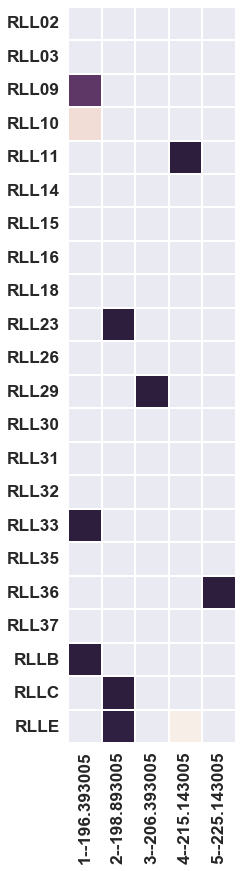

In [389]:
locus_t = pivotdf.loc['RLL',:]['disseminated']
plot_heatmap(locus_t, '17814')
# mas, ticks = make_heatmap_arr_data(locus_t['disseminated'])


In [386]:
locus_t

barcode_id                                      1           2           3  \
max_lesion_z                          -196.393005 -198.893005 -206.393005   
z           lesion lesion_dissem_type                                       
-187.643005 RLL02  containing           -1.000000   -1.000000        -1.0   
-191.393005 RLL03  containing           -1.000000   -1.000000        -1.0   
-196.393005 RLL09  disseminating        83.579988   -1.000000        -1.0   
            RLL10  disseminating         8.588407   -1.000000        -1.0   
-198.893005 RLL11  disseminating        -1.000000   -1.000000        -1.0   
-201.393005 RLL14  containing           -1.000000   -1.000000        -1.0   
            RLL15  containing           -1.000000   -1.000000        -1.0   
            RLL16  containing           -1.000000   -1.000000        -1.0   
-203.893005 RLL18  containing           -1.000000   -1.000000        -1.0   
-206.393005 RLL23  disseminating        -1.000000  100.000000        -1.0   
-210.143005 RLL26  containing           -1.000000   -1.000000        -1.0   
-215.143005 RLL29  disseminating        -1.000000   -1.000000       100.0   
            RLL30  containing           -1.000000   -1.000000        -1.0   
            RLL31  containing           -1.000000   -1.000000        -1.0   
            RLL32  containing           -1.000000   -1.000000        -1.0   
            RLL33  disseminating       100.000000   -1.000000        -1.0   
-222.643005 RLL35  containing           -1.000000   -1.000000        -1.0   
-225.143005 RLL36  disseminating        -1.000000   -1.000000        -1.0   
            RLL37  containing           -1.000000   -1.000000        -1.0   
-inf        RLLB   disseminating       100.000000   -1.000000        -1.0   
            RLLC   disseminating        -1.000000  100.000000        -1.0   
            RLLE   disseminating        -1.000000   98.712716        -1.0   

barcode_id                                      4           5  
max_lesion_z                          -215.143005 -225.143005  
z           lesion lesion_dissem_type                          
-187.643005 RLL02  containing           -1.000000          -1  
-191.393005 RLL03  containing           -1.000000          -1  
-196.393005 RLL09  disseminating        -1.000000          -1  
            RLL10  disseminating        -1.000000          -1  
-198.893005 RLL11  disseminating       100.000000          -1  
-201.393005 RLL14  containing           -1.000000          -1  
            RLL15  containing           -1.000000          -1  
            RLL16  containing           -1.000000          -1  
-203.893005 RLL18  containing           -1.000000          -1  
-206.393005 RLL23  disseminating        -1.000000          -1  
-210.143005 RLL26  containing           -1.000000          -1  
-215.143005 RLL29  disseminating        -1.000000          -1  
            RLL30  containing           -1.000000          -1  
            RLL31  containing           -1.000000          -1  
            RLL32  containing           -1.000000          -1  
            RLL33  disseminating        -1.000000          -1  
-222.643005 RLL35  containing           -1.000000          -1  
-225.143005 RLL36  disseminating        -1.000000         100  
            RLL37  containing           -1.000000          -1  
-inf        RLLB   disseminating        -1.000000          -1  
            RLLC   disseminating        -1.000000          -1  
            RLLE   disseminating         1.287284          -1

In [186]:
mas, ticks = make_heatmap_arr_data(locus_t['disseminated'])

In [388]:
def make_heatmap_arr_data(locusdf):
    
    mask = locusdf.values==-1
    yticklabels = np.array(["%s"%(l[1]) for l in locusdf.index.values])
    ytl_rev_idx = np.array(sorted(range(len(yticklabels)), reverse=True))
    yticklabels = yticklabels[ytl_rev_idx]
    return mask, yticklabels

In [206]:
def plot_heatmap(locusdf, monkey):
    
    mask, yticklabels = make_heatmap_arr_data(locusdf)

    # actually plot the thing
    f, ax = plt.subplots(1)
    ax = sns.heatmap( locusdf, vmin=0, mask=mask, ax=ax, square=True, linewidths=1, cbar=False )
    
    # axes formatting and such
    ax.set_xlabel("")
    ax.set_ylabel("")
    xticklabels = [t.get_text() for t in ax.get_xticklabels()]
    
    ax.tick_params(axis='both', which='major', pad=8)
    ax.set_xticklabels(xticklabels, rotation=90, ha='center', fontsize='x-large', weight='semibold')
    ax.set_yticklabels(yticklabels, rotation=0, ha='right', fontsize='x-large', weight='semibold')
    
#     title = " ".join([monkey, tissue, locus if locus!='na' else "", dissem])
#     ax.set_title(title, size='large', y=1.02)
    w = len(xticklabels)*.6
    h = len(yticklabels)
    f.set_size_inches(w, h)
    # YAY!
    return f, ax, title

In [261]:
pivotdf, loci, barcode_types = make_pivot_df(files[0])

In [12]:
# def iterate_pivoted(pivotdf, monkey):
#     graphs = {}

#     tiss_loc_keys = np.unique(pivotdf.reset_index('lesion').index.values)
#     dissem_keys = np.unique(pivotdf.columns.get_level_values('dissem_type'))
#     for tiss, loc in tiss_loc_keys:
#         for dissem in dissem_keys:
#             key = (tiss, loc, dissem)
#             f, ax, title = plot_heatmap(key, pivotdf, monkey)
#             graphs[key] =  f,ax
#     return graphs


In [318]:
all_graphs = {}
pivoted_dfs = {}

# pivotdf = make_pivot_df(files[0])
# if not os.path.isdir("../data/pivoted-noculturesstuffs"): os.mkdir("../data/pivoted-noculturesstuffs")
for f in files:
    monkey = f[:-4].split("-")[1]
    pivoted, loci, barcode_types = make_pivot_df(data)
    for locus in loci:
        for btype in barcode_types:
            locus_t = pivotdf.loc[locus,:][btype]
            mask, yticklabels = make_heatmap_arr_data(locus_t)
    #  pivoted.to_csv("../data/pivoted/pivoted-%s.csv"%monkey)
        all_graphs[monkey] = graphs
    break
break

ValueError: too many values to unpack

In [31]:
# # for noticklabels
# if not os.path.isdir(OTHER_OUTPUT_FOLDER): os.mkdir(OTHER_OUTPUT_FOLDER)

# for monkey, graphs in all_graphs.items():
#     monkey_path = "%s/%s/"%(OTHER_OUTPUT_FOLDER, str(monkey))
#     if not os.path.isdir(monkey_path): 
#         os.mkdir(monkey_path)
#     for fmt in FORMATS:
#         fmt_path = monkey_path+fmt+"/"
#         if not os.path.isdir(fmt_path):
#             os.mkdir(fmt_path)
#     for key, (f,ax) in graphs.items():
#         tissue_type, locus, dissem = key
#         if tissue_type != 'LN': ax.set_xticklabels([])
#         if dissem == 'contained': ax.set_yticklabels([])
#         title = locus if tissue_type == 'Gran' else tissue_type
#         for fmt in FORMATS:
#             file_path = "%s%s/%s-%s-%s.%s"%(monkey_path, fmt, monkey, title, dissem, fmt)
#             f.savefig(file_path)


In [16]:
# if not os.path.isdir(OUTPUT_FOLDER): os.mkdir(OUTPUT_FOLDER)
# for monkey, graphs in all_graphs.items():
#     monkey_path = "%s/%s/"%(OUTPUT_FOLDER, str(monkey))
#     if not os.path.isdir(monkey_path): 
#         os.mkdir(monkey_path)
#     for fmt in FORMATS:
#         fmt_path = monkey_path+fmt+"/"
#         if not os.path.isdir(fmt_path):
#             os.mkdir(fmt_path)
#     for key, (f,ax) in graphs.items():
#         tissue_type, locus, dissem = key
#         title = locus if tissue_type == 'Gran' else tissue_type
#         for fmt in FORMATS:
#             file_path = "%s%s/%s.%s"%(monkey_path, fmt, title, fmt)
#             f.savefig(file_path)
